![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.
3. What should we do with the `customer_id` column?
4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 
    ```py
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
    ```
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.


1. Import the necessary libraries if you are starting a new notebook.


In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.


In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

3. What should we do with the `customer_id` column?


Here, we turned it into an index

In [4]:
customer_df2 = customer_df.set_index('Customer')
customer_df2.head()


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


🐍 Now we need to make our column headers 'cleaner' by applying snake case. 

In [5]:
# Make headers snake case aka PEP 8
customer_df2.columns = [x.lower() for x in customer_df2.columns]
customer_df2.columns = customer_df2.columns.str.replace("[ ]", "_", regex=True)

# Check that everything has been reformatted properly
list(customer_df2.columns)

# source: Source: https://realpython.com/python-pep8/

['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 


In [6]:
numericals = customer_df2.select_dtypes(np.number) # create a data frame with numerical variables
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [7]:
categoricals = customer_df2.select_dtypes(np.object_) # create a data frame with numerical variables
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 

However, this time you will try a different plot. 
-This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

<AxesSubplot: xlabel='vehicle_size', ylabel='total_claim_amount'>

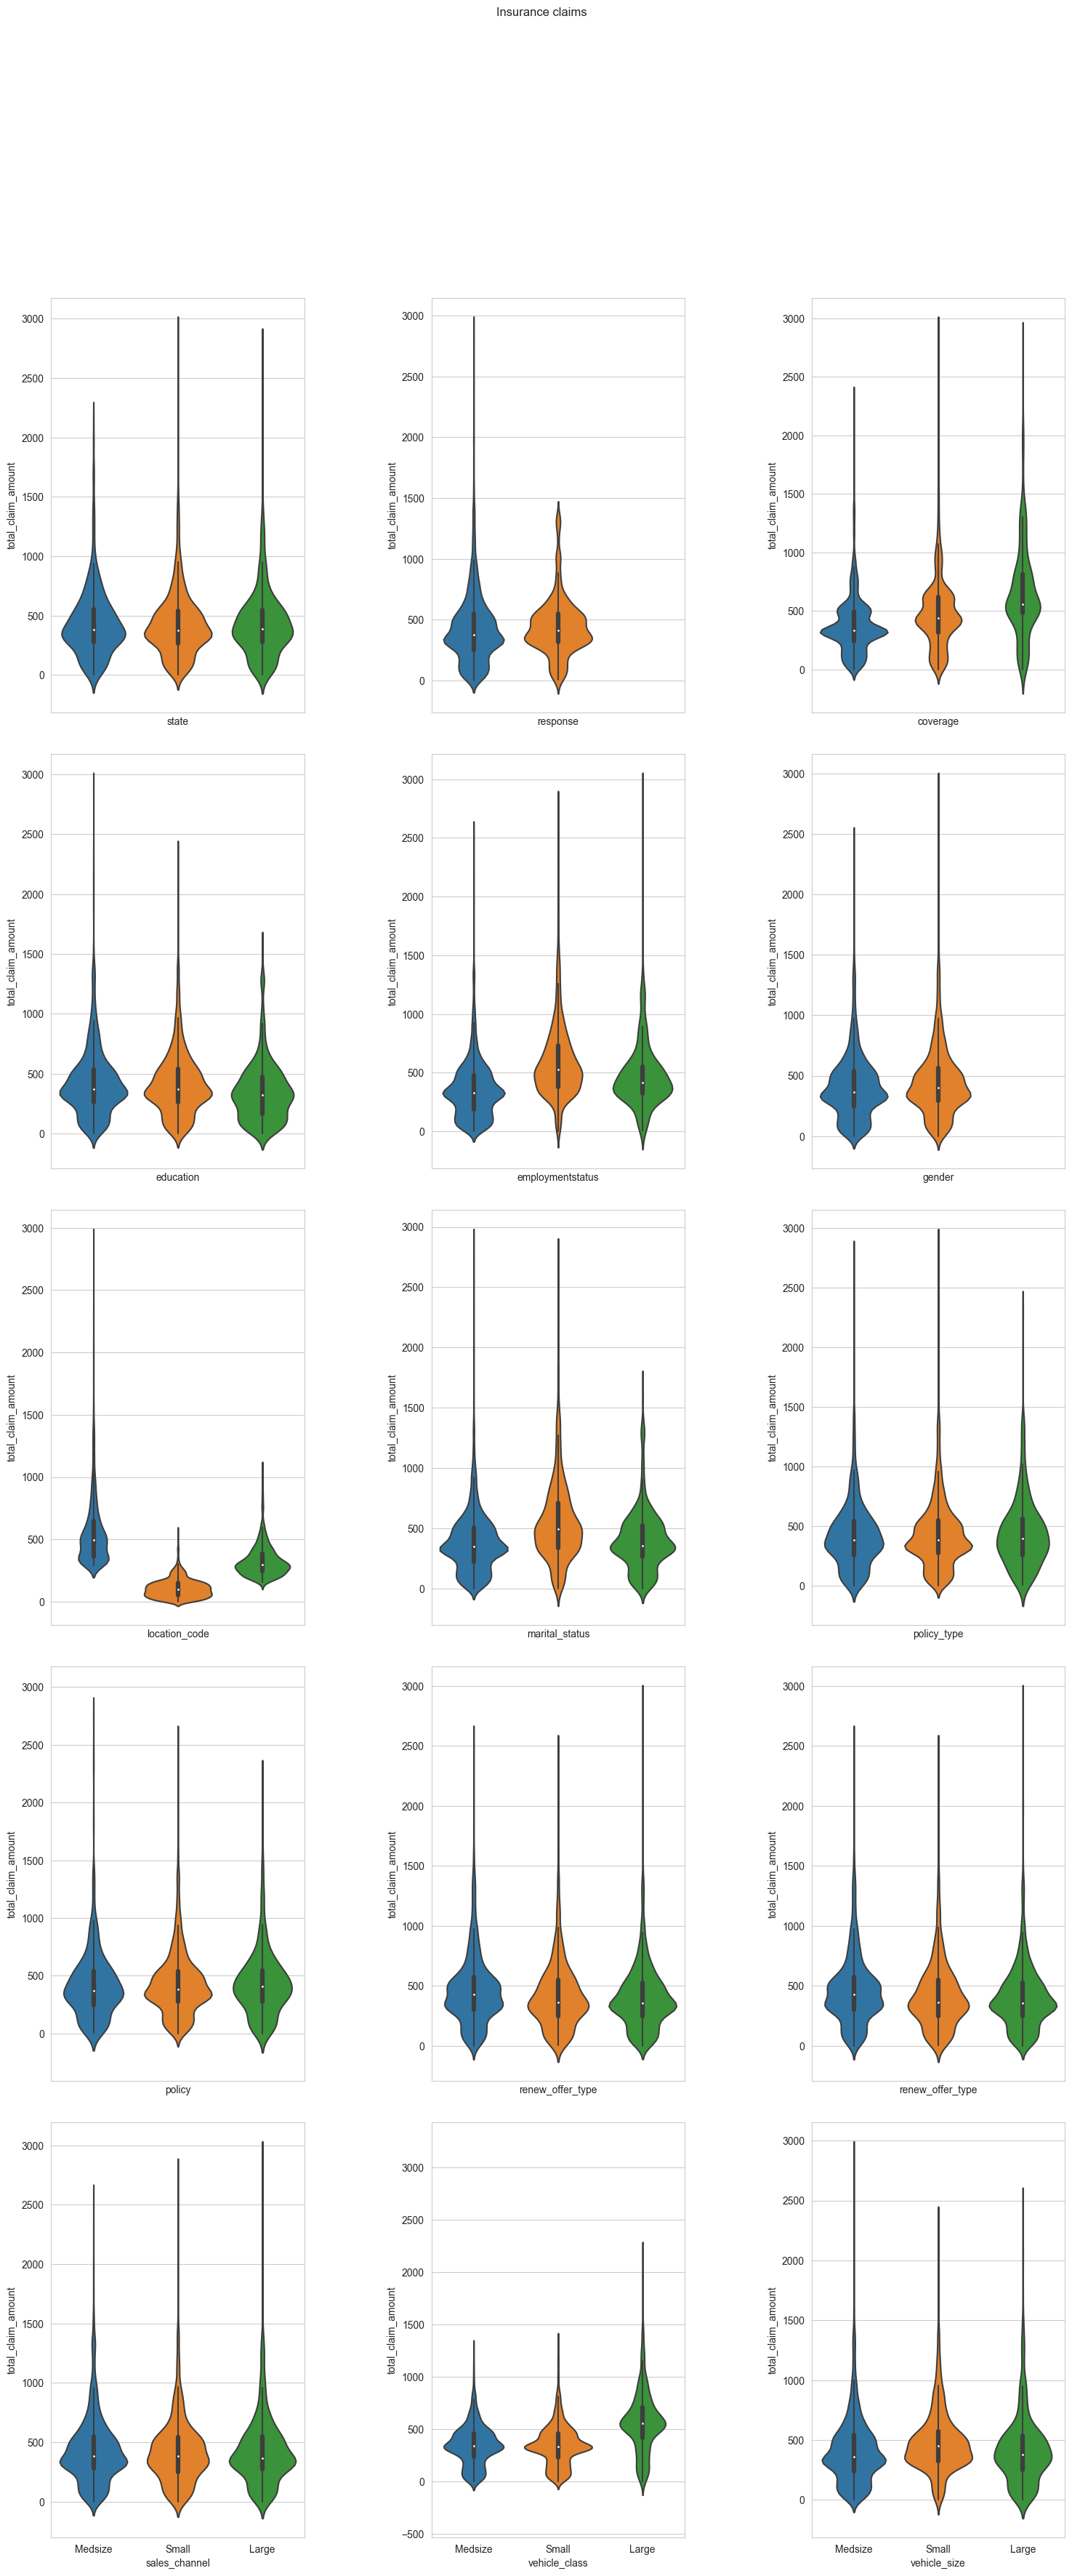

In [8]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) # 5 rows  x 3 columns and a shared x axis (sharex=true)

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

fig.suptitle('Insurance claims')

sns.violinplot(ax=axes[0, 0], data=customer_df2, y="total_claim_amount", x="state")
sns.violinplot(ax=axes[0, 1], data=customer_df2, y="total_claim_amount", x="response")
sns.violinplot(ax=axes[0, 2], data=customer_df2, y="total_claim_amount", x="coverage")
sns.violinplot(ax=axes[1, 0], data=customer_df2, y="total_claim_amount", x="education")
sns.violinplot(ax=axes[1, 1], data=customer_df2, y="total_claim_amount", x="employmentstatus")
sns.violinplot(ax=axes[1, 2], data=customer_df2, y="total_claim_amount", x="gender")
sns.violinplot(ax=axes[2, 0], data=customer_df2, y="total_claim_amount", x="location_code")
sns.violinplot(ax=axes[2, 1], data=customer_df2, y="total_claim_amount", x="marital_status")
sns.violinplot(ax=axes[2, 2], data=customer_df2, y="total_claim_amount", x="policy_type")
sns.violinplot(ax=axes[3, 0], data=customer_df2, y="total_claim_amount", x="policy")
sns.violinplot(ax=axes[3, 1], data=customer_df2, y="total_claim_amount", x="renew_offer_type")
sns.violinplot(ax=axes[3, 2], data=customer_df2, y="total_claim_amount", x="renew_offer_type")
sns.violinplot(ax=axes[4, 0], data=customer_df2, y="total_claim_amount", x="sales_channel")
sns.violinplot(ax=axes[4, 1], data=customer_df2, y="total_claim_amount", x="vehicle_class")
sns.violinplot(ax=axes[4, 2], data=customer_df2, y="total_claim_amount", x="vehicle_size")

6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [9]:
## Count instances of the target variable 
#count frequency of each value in 'Churn' column
counts = customer_df2['sales_channel'].value_counts()
##count frequency of each value in 'Churn' column as percentage of total 
pct = customer_df2['sales_channel'].value_counts(normalize=True)

#concatenate results into one DataFrame
pd.concat([counts,pct], axis=1, keys=['n', '%'])

,n,%
Agent,3477,0.380666
Branch,2567,0.281038
Call Center,1765,0.193234
Web,1325,0.145062


In [10]:
# create an empty data frame to store the results
results_df = pd.DataFrame()

# iterate through the columns in the data frame
for col in categoricals.columns:
    # count the values in the column
    counts = categoricals[col].value_counts()
    # calculate the percentage of each value in the column
    pct = categoricals[col].value_counts(normalize=True)
    # concatenate the results into one data frame
    df = pd.concat([counts, pct], axis=1, keys=['n', '%'])
    # add a column to identify which column the results are for
    df['Column'] = col
    # append the results to the overall results data frame
    results_df = pd.concat([results_df, df], axis=0)

    pd.set_option('display.max_rows', None) #show all rows

# print the results
print(results_df)



                         n         %             Column
California            3150  0.344865              state
Oregon                2601  0.284760              state
Arizona               1703  0.186446              state
Nevada                 882  0.096562              state
Washington             798  0.087366              state
No                    7826  0.856799           response
Yes                   1308  0.143201           response
Basic                 5568  0.609591           coverage
Extended              2742  0.300197           coverage
Premium                824  0.090212           coverage
Bachelor              2748  0.300854          education
College               2681  0.293519          education
High School or Below  2622  0.287059          education
Master                 741  0.081125          education
Doctor                 342  0.037443          education
1/10/11                195  0.021349  effective_to_date
1/27/11                194  0.021239  effective_

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot encoding to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```

#### Create a copy of the dataframe for the data wrangling.


In [11]:
customer_df3 = customer_df2
customer_df3.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Separating the dataframes

In [12]:
categoricals = customer_df3.select_dtypes(np.object)
numericals = customer_df3.select_dtypes(np.number)

print("Dataframe of numerical columns: ")
print()

display(numericals.head()) # only display the top 5 rows


print("Dataframe of categorical columns: ")
print()

display(categoricals.head())# only display the top 5 rows 



Dataframe of numerical columns: 



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


Dataframe of categorical columns: 



,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Normalize the continuous variables. You can use any one method you want.


### **Mix-max normalisation**

In [13]:
#normalize values using min-max normalization

numericals_norm =(numericals-numericals.min())/(numericals.max()-numericals.min())

#view normalized DataFrame 
numericals_norm.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
QZ44356,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
AI49188,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
WW63253,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
HB64268,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [ ]:
# checking distribution of our data (still part of the EDA)
#plt.rc('figure', figsize=(2, 2)) # make the plots smaller 

# useful to show all plots from a dataframe
# if the data is skewed 
#for column in numericals_norm.columns:
 #   sns.distplot(numericals_norm[column])
 #   plt.show()

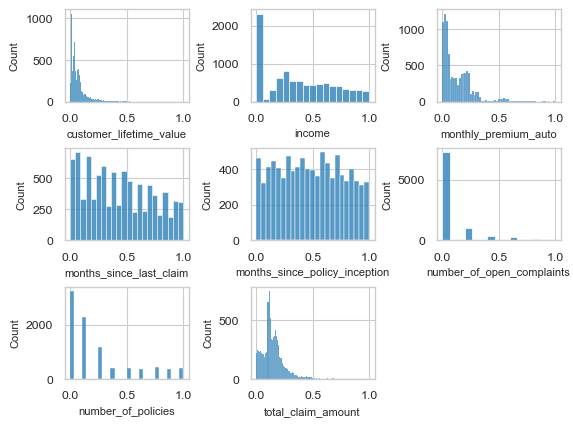

In [24]:
# plot all the histograms as a matrix 



sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})   # adjust label size

plt.subplots_adjust(hspace=.5, wspace=.5) # ensure that the plots do not overlap

for i, column in enumerate(numericals_norm.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numericals_norm[column])


### **Normalising to the mean**

In [25]:
#normalize values using mean normalization

numericals_norm_mean = (numericals-numericals.mean())/numericals.std()

#view normalized DataFrame 
numericals_norm_mean.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,-0.762836,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,-0.169630
QZ44356,-0.149237,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,2.400606
AI49188,0.710597,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,0.455709
WW63253,-0.052260,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,0.329750
HB64268,-0.755534,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,-1.018788


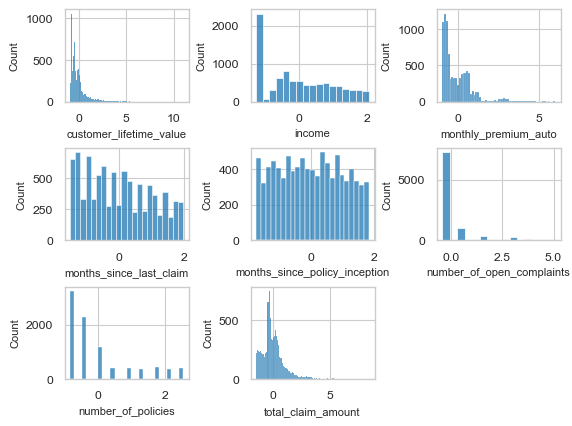

In [26]:
# checking distribution of our data

sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})   # adjust label size

plt.subplots_adjust(hspace=.5, wspace=.5) # ensure that the plots do not overlap

for i, column in enumerate(numericals_norm_mean.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numericals_norm_mean[column])

Both methods seem to produce similar results.

# Encoding the categorical variables


## Removing outliers

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [27]:
customer_df2.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [28]:
# encode state as dummy variables
dummies = pd.get_dummies(customer_df2.state)
dummies.head()
# this gives 5 columns as we have 5 categories in the state variable 

,Arizona,California,Nevada,Oregon,Washington
Customer,,,,,
BU79786,0,0,0,0,1
QZ44356,1,0,0,0,0
AI49188,0,0,1,0,0
WW63253,0,1,0,0,0
HB64268,0,0,0,0,1


In [ ]:
merged = pd.concat([customer_df2,dummies],axis=1) # append the encoded states to the dataframe
merged.head()

In [ ]:
final = merged.drop(['state'], axis=1)
final.head()

In [ ]:
# encode variables as 
customer_df2["coverage"] = customer_df2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
customer_df2.head()

In [ ]:

import numpy as np
print(np.where(customer_df2['customer_lifetime_value']>10))

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.
